In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv('lowincomeprofiles.csv')
#data.drop(columns=['Households With 0 Vehicles'])
#model =DecisionTreeClassifier()
data.drop(data[data['Inside KCMO or Not'] == 'Outside'].index, inplace = True)
#x=data[['Households With Income Less Than $10,000','Total Households Paying 30% Or More Of Income For Housing Expenses']]
#y=data['Persons In Poverty']
#model.fit(x,y)
datat = data.drop(['Civilian 16 Or Older Total Unemployed'], axis=1)
#data.drop(columns=['Inside KCMO or Not'])
#df = pd.to_numeric(data['Persons In Poverty'], downcast="float")
datat


,Island,Census Tract,Inside KCMO or Not,East-West Coordinate,North-South Coordinate,Population,Male,Female,White,Black,...,Households With 1 Vehicle,Households With 2 Vehicles,Households With 3 Or More Vehicles,Aggregate Vehicles,Language Isolated Households,Total Households Among Whom Language Isolation Determined,Disabled Persons,Total Persons Among Whom Disability Determined,Persons Lacking Health Insurance,Total Persons Among Whom Lack Of Health Insurance Determined
0,1,601,Inside,"2,771,674","971,518",103,52,51,97,0,...,12,7,0,25,0,17,0,90,12,90
1,2,202.01,Inside,"2,769,244","1,092,055","4,829","2,566","2,263","3,597",352,...,990,674,400,"3,601",139,"2,252",565,"4,829",682,"4,829"
2,3,202.02,Inside,"2,761,381","1,095,073","3,581","1,816","1,765","3,135",120,...,564,659,330,"3,036",25,"1,567",403,"3,567",256,"3,567"
3,4,203,Inside,"2,768,859","1,100,172","5,450","2,598","2,852","4,152",567,...,804,"1,027",353,"3,922",83,"2,265",808,"5,450",576,"5,450"
4,5,204,Inside,"2,772,599","1,096,332","2,667","1,352","1,315","1,493",537,...,571,359,157,"1,796",130,"1,131",391,"2,667",428,"2,667"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,303.05,Inside,"2,725,228","1,121,173",45,30,15,45,0,...,0,13,0,30,0,14,0,45,0,45
169,170,303.06,Inside,"2,721,245","1,121,236",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,171,303.07,Inside,"2,726,229","1,142,420",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,172,303.08,Inside,"2,731,202","1,127,737","5,042","2,208","2,834","4,248",382,...,854,899,339,"3,877",9,"2,254",693,"4,986",203,"4,986"


In [89]:
datat.keys()

Index(['Island', 'Census Tract', 'East-West Coordinate',
       'North-South Coordinate', 'Population', 'Male', 'Female', 'White',
       'Black', 'Native American',
       ...
       'Households With 1 Vehicle', 'Households With 2 Vehicles',
       'Households With 3 Or More Vehicles', 'Aggregate Vehicles',
       'Language Isolated Households',
       'Total Households Among Whom Language Isolation Determined',
       'Disabled Persons', 'Total Persons Among Whom Disability Determined',
       'Persons Lacking Health Insurance',
       'Total Persons Among Whom Lack Of Health Insurance Determined'],
      dtype='object', length=210)

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [92]:
from sklearn.preprocessing import LabelEncoder
df = datat.apply(LabelEncoder().fit_transform)
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [93]:
scaled_data=scaler.transform(df)

In [94]:
scaled_data

array([[-1.72206772,  0.90108195,  0.        , ...,  1.74430973,
        -1.09829416,  1.74430973],
       [-1.70204368, -0.38045682,  0.        , ...,  1.02898325,
         1.19584737,  1.02898325],
       [-1.68201964, -0.36043278,  0.        , ...,  0.47715997,
        -0.53043735,  0.47715997],
       ...,
       [ 1.68201964,  0.50060108,  0.        , ..., -1.48487836,
        -1.39357971, -1.48487836],
       [ 1.70204368,  0.52062513,  0.        , ...,  1.11073485,
        -0.78029435,  1.11073485],
       [ 1.72206772,  0.54064917,  0.        , ...,  0.68153896,
        -1.39357971,  0.68153896]])

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca=PCA(n_components=2)

#x_pca=pca.transform(scaled_data)


In [97]:
pca.fit(scaled_data)

PCA(n_components=2)

In [98]:
x_pca=pca.transform(scaled_data)

In [99]:
scaled_data.shape

(173, 210)

In [100]:
x_pca.shape

(173, 2)

In [101]:
x_pca

array([[ 1.01401767e+01,  2.77952337e+00],
       [-9.94168519e+00, -4.62144239e-02],
       [-2.88135926e+00,  7.09746131e+00],
       [-9.81184710e+00,  4.34626778e+00],
       [-1.72585201e+00, -2.61461904e+00],
       [-1.01678253e+01,  9.09612895e-01],
       [-6.79435657e+00, -1.08360582e+00],
       [-3.95193638e+00,  5.79097842e-01],
       [-1.05608771e+01,  2.23490105e+00],
       [-1.04614062e+01,  6.56971306e+00],
       [ 8.49173313e-01, -1.14578636e+00],
       [-9.52323337e+00,  1.28500535e+00],
       [-9.44799449e+00,  5.56281205e+00],
       [-9.28262798e+00,  6.29931925e+00],
       [-2.64118882e+00,  6.84971220e-01],
       [-1.01670854e+01,  3.44936746e+00],
       [-8.72940756e-01,  6.40816617e+00],
       [-9.47810775e+00,  7.47017142e+00],
       [-1.00211459e+01,  6.44244470e+00],
       [-7.71149563e+00,  6.77289013e+00],
       [-1.77817581e+00,  9.05689478e+00],
       [-6.36705495e+00,  7.32800664e+00],
       [-5.25903543e+00,  9.02176448e+00],
       [ 1.

Text(0, 0.5, 's p c')

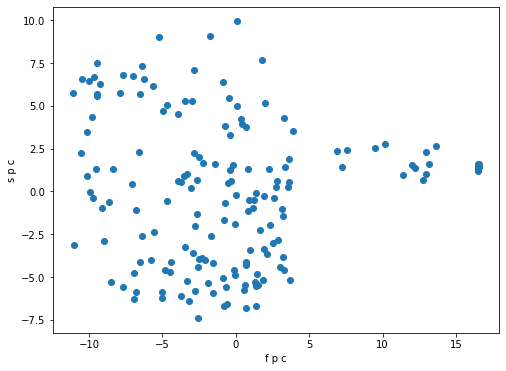

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('f p c')
plt.ylabel('s p c')

In [103]:
from sklearn.linear_model import LinearRegression

In [ ]:


from sklearn import linear_model
y = data['Civilian 16 Or Older Total Unemployed']

regr = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.5, random_state=1)
model = regr.fit(X_train, y_train)
predictedCO2 = model.predict([[-3.1,-3.8]])
print(predictedCO2)
#print(regr.intercept_)
#print(regr.coef_)
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, predictedCO2)
#print(model.score([y_test, predictedCO2]))
print(X_test)
print(y_test)
#r2_score(predictedCO2,y)
regr.score(x_pca,y)



In [170]:
data.shape

(173, 211)